# Problem Sheet 7 - Kernel Ridge Regression
**Submission until Dezember 19 at 5 p.m. in the corresponding folder in StudIP.** \
In this exercise we consider the Kernel Ridge Regression. For a given data matrix $X \in\mathbb{R}^{n,p}$ (s.t. $n$ is larger than p), response $y \in\mathbb{R}^{n}$ and ridge parameter $\lambda \in \mathbb{R}_{\geq 0}$ we want to find weights $w \in\mathbb{R}^{p}$ such that
$$
y \approx Xw
$$
under the condition that $\lambda \Vert w \Vert $ is relatively small. So we want to compute
$$
w = \underset{z \in\mathbb{R}^{p}}{\mathrm{argmin}} \ \Vert y - Xz \Vert_{2}^{2} \ + \ \lambda \Vert z \Vert_{2}^{2}.
$$
This is what we call Ridge Regression (or Linear Regression if $\lambda = 0$).

We first construct a data set of $40$ points in $\mathbb R^2$.

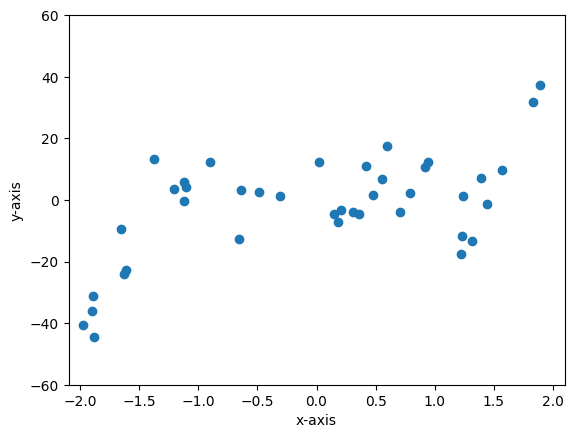

In [6]:
import numpy as np
import random
import matplotlib.pyplot as plt

random.seed(42)

x = np.array([random.uniform(-2,2) for _ in range(0,40)]).reshape(40,1)
y = (10*(x**2)*np.sin(4*x) + 5*x + 1) + 25*(np.random.rand(40).reshape(40,1) - 0.5)

plt.scatter(x,y)
plt.xlim([-2.1,2.1])
plt.ylim([-60,60])
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.show()

## Linear Regression and Ridge Regression
At first we try to fit our given data with certain linear and ridge regression.

**Task: Apply linear regression and ridge regression for $\lambda = 20$ for our given data. Plot the results. (3/3 points)**

Hint You can use `np.linalg.lstsq` to compute linear and ridge regression.

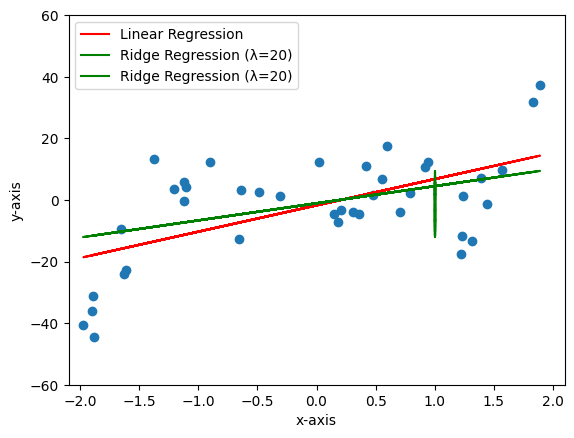

In [7]:
X = np.c_[x,np.ones((40, 1))]
m, c = np.linalg.lstsq(X, y, rcond=None)[0]

lamda=30
# W=np.linalg.inv(X.T @ X + lamda * np.identity(2))@X.T@y
W, residuals_ridge, _, _ = np.linalg.lstsq(X.T @ X + lamda * np.identity(2), X.T @ y, rcond=None)

plt.scatter(x,y)
plt.plot(x,m*x+c, 'r-', label='Linear Regression')
plt.plot(X, X@W , 'g-', label='Ridge Regression (λ=20)')
plt.xlim([-2.1,2.1])
plt.ylim([-60,60])
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.legend()
plt.show()
plt.show()

## Kernel Ridge Regression
**Task: Implement the kernel ridge regression for the Gaussian kernel and the polynomial kernel of different degree. (6/6 points)**

The polynomial kernel of degree $d$ is given by
$$
k_{d}(x,x') = \left(\langle x,x' \rangle + c \right)^d,
$$
for $x,x' \in \mathbb{R}^{n}$ and $ c \in \mathbb{R}_{\geq 0}$.

The Gaussian kernel is given by
$$
k(x,x') = \exp \left(-\frac{1}{2} \frac{\lVert x - x' \rVert_{2}^{2}}{\sigma^{2}} \right),
$$
for $x,x' \in \mathbb{R}^{n}$ and $ \sigma \in \mathbb{R}_{\geq 0}$.

Hint: Use the kernel trick.

In [8]:
def poly_kernel(X1,X2,d,c):
    return (np.dot(X1, X2) + c)**d

def gaussian_kernel(X1,X2,sigma):
    K_g = np.zeros((X1.shape[0], X2.shape[0]))
    for i in range (X1.shape[0]):
       for j in range(X2.shape[0]):
           K_g[i, j]=np.exp(-np.linalg.norm(X1[i]-X2[j])/2*sigma**2)
    return K_g

def poly_kernel_ridge_regression(X_test ,X_data,y,d,c,lambd):
     n_data = X_data.shape[0]
     K = np.zeros((n_data, n_data))
     for i in range(n_data):
          for j in range(n_data):
              K[i, j] = poly_kernel(X_data[i], X_data[j], d, c)
     I=np.identity(n_data)
     alpha=np.linalg.inv(K+lambd*I)@y
     y_predict = []
     for j in range(X_test.shape[0]):
         y_cap = 0  # Initialize y_cap for each X_test sample
         for i in range(X_data.shape[0]):
             y_cap += alpha[i] * poly_kernel(X_data[i], X_test[j], d, c)
         y_predict.append(y_cap)

     return np.array(y_predict)


def gaussian_kernel_ridge_regression(X_test ,X_data,y,sigma, lambd):
    n_data = X_data.shape[0]
    K = np.zeros((n_data, n_data))
    for i in range(n_data):
        for j in range(n_data):
            K[i, j] = gaussian_kernel(X_data[i], X_data[j], sigma)
    I=np.identity(n_data)
    alpha=np.linalg.inv(K+lambd*I)@y
    y_predict = []
    for j in range(X_test.shape[0]):
         y_cap = 0  # Initialize y_cap for each X_test sample
         for i in range(X_data.shape[0]):
             y_cap += alpha[i] * gaussian_kernel(X_data[i], X_test[j],sigma)
         y_predict.append(y_cap)
    original_array = np.array(y_predict)
    reshaped_array = original_array.reshape(X_test.shape[0], 1)
    return reshaped_array

**Task: Implement the feature map for the polynomial kernel of degree $2$. Compute the weights and plot the result using the feature map for $c=10$ and $\lambda = 1$. (0/4 points)**

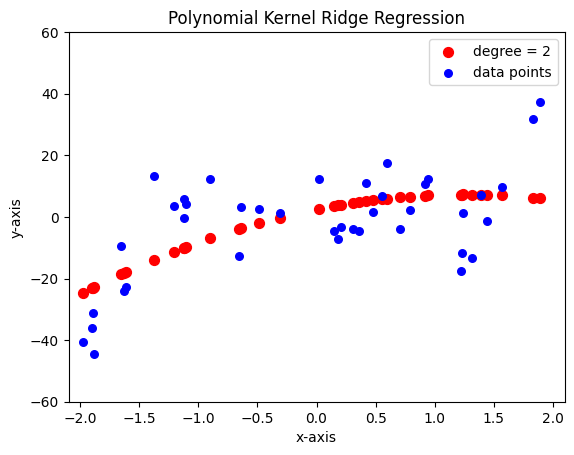

In [9]:
c = 10 #correction: you did not implement the feauter map (-4 points)
lambd = 1 
d=2
predicted_values =  poly_kernel_ridge_regression(x,x,y,d,c,lambd)

plt.title("Polynomial Kernel Ridge Regression")
plt.scatter( x,predicted_values, c = "red", s = 50, label='degree = 2')
plt.scatter(x,y, c = "blue",s = 30, label='data points')
plt.xlim([-2.1,2.1])
plt.ylim([-60,60])
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.legend()
plt.show()

Execute the following code.

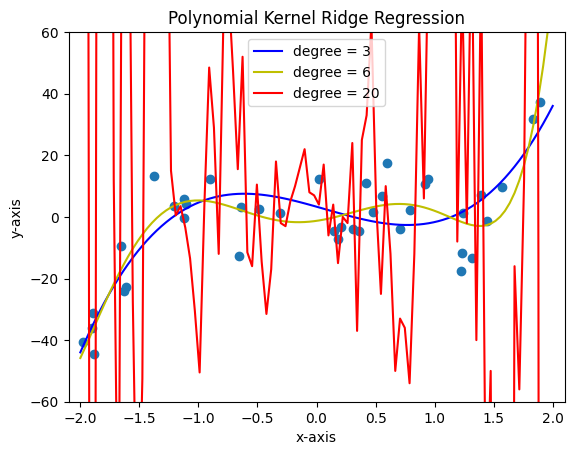

In [10]:
X_test = np.linspace(-2,2,100).reshape(100,1)
y_predict_poly3 = poly_kernel_ridge_regression(X_test ,x,y,3,10,1)
y_predict_poly6 = poly_kernel_ridge_regression(X_test ,x,y,6,10,1)
y_predict_poly20 = poly_kernel_ridge_regression(X_test ,x,y,20,10,1)
plt.plot(X_test, y_predict_poly3, "b", label='degree = 3')
plt.plot(X_test, y_predict_poly6, "y", label='degree = 6')
plt.plot(X_test, y_predict_poly20, "r", label='degree = 20')
plt.title("Polynomial Kernel Ridge Regression")
plt.scatter(x,y)
plt.xlim([-2.1,2.1])
plt.ylim([-60,60])
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.legend()
plt.show()

**Task: Explain the different results. (2/2 points)**

**Degree = 3 (y_predict_poly3):**

The polynomial kernel of degree 3 models a cubic relationship between the input features and the output. It can capture moderate complexity in the data.
The blue curve (degree = 3) in the plot represents the predicted values for each input in X_test.

**Degree = 6 (y_predict_poly6):**

A polynomial kernel of degree 6 allows the model to capture more complex relationships in the data, potentially fitting the training data more closely.
The yellow curve (degree = 6) in the plot represents the predicted values for each input in X_test.

**Degree = 20 (y_predict_poly20):**

A polynomial kernel of degree 20 is highly flexible and can fit the training data very closely, including capturing noise and fluctuations.
The red curve (degree = 20) in the plot represents the predicted values for each input in X_test.

Notice that for the case of degree=20, we have given too much flexibility. The curve(red), trying to fit all the point, oscillates in between the points and thus most likely to perform bad in future prediction. Borrowing the words for statistical literature we say that, trying to minimize BIAS we overfit the model and maximize VARIANCE. From statistics we that model error consists of both BIAS (+) VARIANCE and they are inversely proportional. When one of the goes down too much other one goes up readily.

**Task: Try different values for $\lambda$ fro the Gaussian kernel ridge regression.**

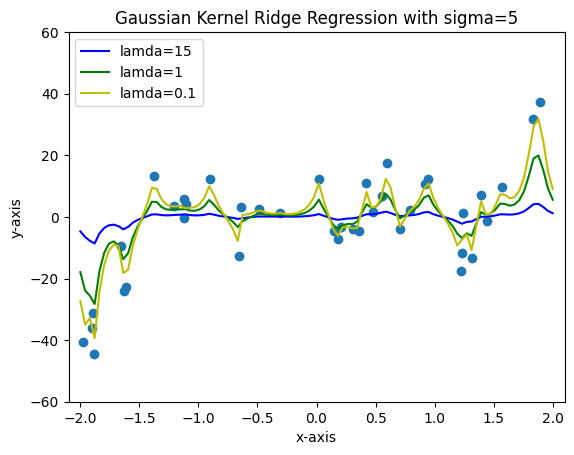

In [11]:
X_test = np.linspace(-2,2,100).reshape(100,1)
y_pre1=gaussian_kernel_ridge_regression(X_test,x,y,5,10)
plt.plot(X_test, y_pre1, "b", label='lamda=15')

y_pre2=gaussian_kernel_ridge_regression(X_test,x,y,5,1)
plt.plot(X_test, y_pre2, "g", label='lamda=1')

y_pre3=gaussian_kernel_ridge_regression(X_test,x,y,5,0.1)
plt.plot(X_test, y_pre3, "y", label='lamda=0.1')

plt.title("Gaussian Kernel Ridge Regression with sigma=5")
plt.scatter(x,y)
plt.xlim([-2.1,2.1])
plt.ylim([-60,60])
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.legend()
plt.show()

**Task: Explain the different results. (2/2 points)**

**Lambda = 15 (y_pre1):**
A high value of lambda (15) imposes a stronger regularization, penalizing the model for fitting the training data too closely. This may lead to a smoother and more generalized model but might underfit the training data if lambda is excessively large.The blue curve (lambda = 15) in the plot represents the predicted values for each input in X_test.

**Lambda = 1 (y_pre2):**
A moderate value of lambda (1) balances the trade-off between fitting the training data and regularization. It allows the model to capture patterns in the data without overfitting.The green curve (lambda = 1) in the plot represents the predicted values for each input in X_test.

**Lambda = 0.1 (y_pre3):**
A low value of lambda (0.1) imposes less regularization, allowing the model to fit the training data more closely. This may result in a model that captures fine details in the data but is more susceptible to overfitting.The yellow curve (lambda = 0.1) in the plot represents the predicted values for each input in X_test.

## Application

In this task we consider a data set from https://jamesmccaffrey.wordpress.com/2023/03/17/example-of-kernel-ridge-regression-using-the-scikit-library/. It contains the following columns:
- sex (0 = male, 1 = female)
- age (age/100)
- michigian (1 = lives in michigan, 0 = does not live in michigan)
- nebraska (1 = lives in nebraska, 0 = does not live in nebraska)
- oklahoma (1 = lives in oklahoma, 0 = does not live oklahoma)
- conservative (1 = true, 0 = false)
- moderate (1 = true, 0 = false)
- liberal (1 = true, 0 = false)

We want to model the income depending on these features.

In [12]:
def gaussian_kernel(x, y, sigma=0.1):
    return np.exp(-np.linalg.norm(x - y) ** 2 / (2.0 * sigma ** 2))

def gaussian_kernel_ridge_regression1(X_test, X_data, y, sigma, lambd):
    n_test, n_data = X_test.shape[0], X_data.shape[0]
    K = np.zeros((n_test, n_data))

    for i in range(n_test):
        for j in range(n_data):
            K[i, j] = gaussian_kernel(X_data[j], X_test[i], sigma)  # Corrected order of arguments

    I = np.identity(n_data)
    alpha = np.linalg.inv(K.T @ K + lambd * I) @ K.T @ y

    return K @ alpha

def poly_kernel_ridge_regression(X_test ,X_data,y,d,c,lambd):
     n_data,n_test = X_data.shape[0],X_test[0]
     K = np.zeros((n_data, n_data))
     for i in range(n_data):
          for j in range(n_data):
              K[i, j] = poly_kernel(X_data[i], X_data[j], d, c)
     I=np.identity(n_data)
     alpha=np.linalg.inv(K+lambd*I)@y
     y_predict = []
     for j in range(X_test.shape[0]):
         y_cap = 0  # Initialize y_cap for each X_test sample
         for i in range(X_data.shape[0]):
             y_cap += alpha[i] * poly_kernel(X_data[i], X_test[j], d, c)
         y_predict.append(y_cap)

     return np.array(y_predict)


In [13]:
import pandas as pd
d=3
c=1
lambd=0.1
sigma=0.1
df = pd.read_csv('/KRR_example.csv',sep='\t')
df.head()
y = df['income'].values
selected_columns = ['sex', 'age', 'michigan', 'nebraska', 'oklahoma', 'conservative', 'moderate', 'liberal']
X = df[selected_columns].values

income_prediction_Gauss=gaussian_kernel_ridge_regression1(X,X,y,sigma,lambd)
income_prediction_Poly =poly_kernel_ridge_regression(X,X,y,d,c,lambd)
print('Norm for original values and Gaussian kernel: ',np.linalg.norm(income_prediction_Gauss-y))
print('Norm for original values and Gaussian kernelpolynomial kernel: ', np.linalg.norm(income_prediction_Poly-y))

Norm for original values and Gaussian kernel:  0.47240343922754285
Norm for original values and Gaussian kernelpolynomial kernel:  0.3506870201134632


**Task: Apply kernel ridge regression for the Gaussian kernel and the polynomial kernel to model the income. Predcit the income for `x1` `x2` and `x3` and compare with the corresponding true income `y1` `y2` and `y3`. (3/3 points)**

Hint: Possible parameters would be $d= 3$, $c = 1$, $\lambda = 0.1$ and $\sigma = 0.1$.

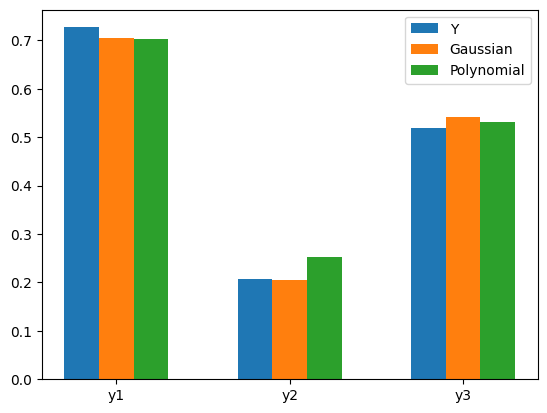

In [60]:
x1 = np.array([1,0.61,0,1,0,1,0,0])
y1 = np.array([0.7270])

x2 = np.array([1,0.18,1,0,0,0,0,1])
y2 =np.array([0.2080])

x3 = np.array([0,0.45,0,0,1,0,1,0])
y3 = np.array([0.5180])

Y=np.column_stack((y1,y2,y3))
X_test = np.row_stack((x1, x2, x3))
income_prediction_Gauss=gaussian_kernel_ridge_regression(X_test,X,y,0.1,0.1)
income_prediction_Poly =poly_kernel_ridge_regression(X_test,X,y,0.1,1,0.1)

labels = ['y1', 'y2', 'y3']
x = np.arange(len(labels))

fig, ax = plt.subplots()
ax.bar(x - 0.2, Y.flatten(), width=0.2, label='Y')
ax.bar(x, income_prediction_Gauss.flatten(), width=0.2, label='Gaussian')
ax.bar(x + 0.2, income_prediction_Poly, width=0.2, label='Polynomial')

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

## Total Points 16/20